In [39]:
# import Libr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', 500)

In [40]:
# Assign Url
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [41]:
# Read Dataset
df = pd.read_csv(url)

In [42]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Data Cleaning & processing

In [43]:
# Checking Duplicates
df.duplicated().sum()

np.int64(0)

In [44]:
# Cheking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [46]:
# Chenking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
# Changing all columns to lower case
df.columns =[i.lower() for i in df.columns]

In [48]:
df.select_dtypes(['object']).columns

Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
       'jobrole', 'maritalstatus', 'over18', 'overtime'],
      dtype='object')

In [49]:
# Cheking all object columns value to lower case
for i in df.select_dtypes(['object']).columns:
    df[i] = df[i].str.lower()

In [50]:
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life sciences,1,1,2,female,94,3,2,sales executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research & development,8,1,life sciences,1,2,3,male,61,2,2,research scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research & development,2,2,other,1,4,4,male,92,2,1,laboratory technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research & development,3,4,life sciences,1,5,4,female,56,3,1,research scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research & development,2,1,medical,1,7,1,male,40,3,1,laboratory technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,no,travel_frequently,884,research & development,23,2,medical,1,2061,3,male,41,4,2,laboratory technician,4,married,2571,12290,4,y,no,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,no,travel_rarely,613,research & development,6,1,medical,1,2062,4,male,42,2,3,healthcare representative,1,married,9991,21457,4,y,no,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,no,travel_rarely,155,research & development,4,3,life sciences,1,2064,2,male,87,4,2,manufacturing director,2,married,6142,5174,1,y,yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,no,travel_frequently,1023,sales,2,3,medical,1,2065,4,male,63,2,2,sales executive,2,married,5390,13243,2,y,no,14,3,4,80,0,17,3,2,9,6,0,8


In [51]:
df.age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [52]:
# Cheking Numeric columns uniqueness
for i in df.select_dtypes('int64').columns:
    print(50*"-")
    print("Unique Values and Count : ", df[i].value_counts().sort_index())
    print(50*"-")

--------------------------------------------------
Unique Values and Count :  age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Values and Count :  dailyrate
102     1
103     1
104     1
105     1
106     1
       ..
1492    1
1495    3
1496    2
1498    1
1499    1
Name: count, Length: 886, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Values and Count :  distancefromhome
1     208
2     211
3      84
4      64
5      65
6      59
7      84
8

In [53]:
df.shape

(1470, 35)

In [54]:
# Cheking all columns unique value counts
for i in df.select_dtypes('object').columns:
    print(50*"-")
    print("Unique Values and Count : ", df[i].value_counts().sort_index())
    print(50*"-")

--------------------------------------------------
Unique Values and Count :  attrition
no     1233
yes     237
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Values and Count :  businesstravel
non-travel            150
travel_frequently     277
travel_rarely        1043
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Values and Count :  department
human resources            63
research & development    961
sales                     446
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Values and Count :  educationfield
human resources      27
life sciences       606
marketing           159
medical             464
other                82
technical degree    132
Name: count, dtype: int64
--------------------------------------------

In [55]:
# Drop uneanted columns
df = df.drop(columns=['over18','standardhours','education'])

In [56]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'educationfield', 'employeecount', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [57]:
df = df[['employeenumber','age','gender','maritalstatus','educationfield','department','jobrole',
    'joblevel','numcompaniesworked','totalworkingyears','trainingtimeslastyear','yearsatcompany','yearsincurrentrole',
    'yearssincelastpromotion','yearswithcurrmanager','percentsalaryhike','hourlyrate','dailyrate','monthlyrate','monthlyincome',
    'businesstravel','overtime','distancefromhome','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction',
    'performancerating','stockoptionlevel','jobsatisfaction','attrition','employeecount']]

In [58]:
# setting employeenumbers column as index
df.set_index('employeenumber',inplace=True)


# Feauture Engineering

In [59]:
df

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,businesstravel,overtime,distancefromhome,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction,attrition,employeecount
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,8,0,6,4,0,5,11,94,1102,19479,5993,travel_rarely,yes,1,1,2,3,1,3,0,4,yes,1
2,49,male,married,life sciences,research & development,research scientist,2,1,10,3,10,7,1,7,23,61,279,24907,5130,travel_frequently,no,8,3,3,2,4,4,1,2,no,1
4,37,male,single,other,research & development,laboratory technician,1,6,7,3,0,0,0,0,15,92,1373,2396,2090,travel_rarely,yes,2,3,4,2,2,3,0,3,yes,1
5,33,female,married,life sciences,research & development,research scientist,1,1,8,3,8,7,3,0,11,56,1392,23159,2909,travel_frequently,yes,3,3,4,3,3,3,0,3,no,1
7,27,male,married,medical,research & development,laboratory technician,1,9,6,3,2,2,2,2,12,40,591,16632,3468,travel_rarely,no,2,3,1,3,4,3,1,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,male,married,medical,research & development,laboratory technician,2,4,17,3,5,2,0,3,17,41,884,12290,2571,travel_frequently,no,23,3,3,4,3,3,1,4,no,1
2062,39,male,married,medical,research & development,healthcare representative,3,4,9,5,7,7,1,7,15,42,613,21457,9991,travel_rarely,no,6,3,4,2,1,3,1,1,no,1
2064,27,male,married,life sciences,research & development,manufacturing director,2,1,6,0,6,2,0,3,20,87,155,5174,6142,travel_rarely,yes,4,3,2,4,2,4,1,2,no,1


In [60]:
[df[df['attrition'] == 'yes'][i].value_counts().sort_values(ascending=False).index.to_list() for i in df.select_dtypes('object')]

[['male', 'female'],
 ['single', 'married', 'divorced'],
 ['life sciences',
  'medical',
  'marketing',
  'technical degree',
  'other',
  'human resources'],
 ['research & development', 'sales', 'human resources'],
 ['laboratory technician',
  'sales executive',
  'research scientist',
  'sales representative',
  'human resources',
  'manufacturing director',
  'healthcare representative',
  'manager',
  'research director'],
 ['travel_rarely', 'travel_frequently', 'non-travel'],
 ['yes', 'no'],
 ['yes']]

In [61]:
order_list = [['male', 'female'],
                ['single', 'married', 'divorced'],
                ['life sciences',
                'medical',
                'marketing',
                'technical degree',
                'other',
                'human resources'],
                ['research & development', 'sales', 'human resources'],
                ['laboratory technician',
                'sales executive',
                'research scientist',
                'sales representative',
                'human resources',
                'manufacturing director',
                'healthcare representative',
                'manager',
                'research director'],
                ['travel_rarely', 'travel_frequently', 'non-travel'],
                ['yes', 'no'],
                ['yes', 'no']]

In [62]:
df['maritalstatus'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [63]:
import sklearn

In [64]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(categories=order_list,dtype='int64')
cat_col2_En=pd.DataFrame(OE.fit_transform(df.select_dtypes('object')),columns=OE.get_feature_names_out())
cat_col2_En

,gender,maritalstatus,educationfield,department,jobrole,businesstravel,overtime,attrition
0,1,0,0,1,1,0,0,0
1,0,1,0,0,2,1,1,1
2,0,0,4,0,0,0,0,0
3,1,1,0,0,2,1,0,1
4,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
1465,0,1,1,0,0,1,1,1
1466,0,1,1,0,6,0,1,1
1467,0,1,0,0,5,0,0,1
1468,0,1,1,1,1,1,1,1


In [65]:
cat_col1 = df[['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','performancerating','stockoptionlevel','jobsatisfaction']]
cat_col1.reset_index(drop=True,inplace=True)
cat_col1

,joblevel,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction
0,2,1,2,3,1,3,0,4
1,2,3,3,2,4,4,1,2
2,1,3,4,2,2,3,0,3
3,1,3,4,3,3,3,0,3
4,1,3,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...
1465,2,3,3,4,3,3,1,4
1466,3,3,4,2,1,3,1,1
1467,2,3,2,4,2,4,1,2
1468,2,2,4,2,4,3,0,2


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_col_sc = pd.DataFrame(sc.fit_transform(df[['age','numcompaniesworked', 'totalworkingyears',
                                                'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
                                                'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
                                                'hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome','distancefromhome']]),
                                                columns=sc.get_feature_names_out())
num_col_sc

,age,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,distancefromhome
0,0.446350,2.125136,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,-1.150554,1.383138,0.742527,0.726020,-0.108350,-1.010909
1,1.322365,-0.678049,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,2.129306,-0.240677,-1.297775,1.488876,-0.291719,-0.147150
2,0.008343,1.324226,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,-0.057267,1.284725,1.414363,-1.674841,-0.937654,-0.887515
3,-0.429664,-0.678049,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,-1.150554,-0.486709,1.461466,1.243211,-0.763634,-0.764121
4,-1.086676,2.525591,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,-0.877232,-1.274014,-0.524295,0.325900,-0.644858,-0.887515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.523316,0.735447,0.155707,-0.327893,-0.615492,-0.679146,-0.314873,0.489376,-1.224807,0.202082,-0.284329,-0.835451,1.703764
1466,0.227347,0.523316,-0.293077,1.707500,-0.001333,0.764998,-0.368715,0.806541,-0.057267,-1.175601,-0.469754,1.004010,0.741140,-0.393938
1467,-1.086676,-0.678049,-0.678774,-2.171982,-0.164613,-0.615492,-0.679146,-0.314873,1.309341,1.038693,-1.605183,-1.284418,-0.076690,-0.640727
1468,1.322365,-0.277594,0.735447,0.155707,0.325228,0.488900,-0.679146,1.086895,-0.330589,-0.142264,0.546677,-0.150393,-0.236474,-0.887515


In [67]:
df_En = pd.concat([cat_col1,cat_col2_En,num_col_sc],axis=1)
df_En

,joblevel,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction,gender,maritalstatus,educationfield,department,jobrole,businesstravel,overtime,attrition,age,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,distancefromhome
0,2,1,2,3,1,3,0,4,1,0,0,1,1,0,0,0,0.446350,2.125136,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,-1.150554,1.383138,0.742527,0.726020,-0.108350,-1.010909
1,2,3,3,2,4,4,1,2,0,1,0,0,2,1,1,1,1.322365,-0.678049,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,2.129306,-0.240677,-1.297775,1.488876,-0.291719,-0.147150
2,1,3,4,2,2,3,0,3,0,0,4,0,0,0,0,0,0.008343,1.324226,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,-0.057267,1.284725,1.414363,-1.674841,-0.937654,-0.887515
3,1,3,4,3,3,3,0,3,1,1,0,0,2,1,0,1,-0.429664,-0.678049,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,-1.150554,-0.486709,1.461466,1.243211,-0.763634,-0.764121
4,1,3,1,3,4,3,1,2,0,1,1,0,0,0,1,1,-1.086676,2.525591,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,-0.877232,-1.274014,-0.524295,0.325900,-0.644858,-0.887515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,3,3,4,3,3,1,4,0,1,1,0,0,1,1,1,-0.101159,0.523316,0.735447,0.155707,-0.327893,-0.615492,-0.679146,-0.314873,0.489376,-1.224807,0.202082,-0.284329,-0.835451,1.703764
1466,3,3,4,2,1,3,1,1,0,1,1,0,6,0,1,1,0.227347,0.523316,-0.293077,1.707500,-0.001333,0.764998,-0.368715,0.806541,-0.057267,-1.175601,-0.469754,1.004010,0.741140,-0.393938
1467,2,3,2,4,2,4,1,2,0,1,0,0,5,0,0,1,-1.086676,-0.678049,-0.678774,-2.171982,-0.164613,-0.615492,-0.679146,-0.314873,1.309341,1.038693,-1.605183,-1.284418,-0.076690,-0.640727
1468,2,2,4,2,4,3,0,2,0,1,1,1,1,1,1,1,1.322365,-0.277594,0.735447,0.155707,0.325228,0.488900,-0.679146,1.086895,-0.330589,-0.142264,0.546677,-0.150393,-0.236474,-0.887515


In [68]:
df_En.columns

Index(['joblevel', 'worklifebalance', 'environmentsatisfaction',
       'jobinvolvement', 'relationshipsatisfaction', 'performancerating',
       'stockoptionlevel', 'jobsatisfaction', 'gender', 'maritalstatus',
       'educationfield', 'department', 'jobrole', 'businesstravel', 'overtime',
       'attrition', 'age', 'numcompaniesworked', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
       'hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome',
       'distancefromhome'],
      dtype='object')

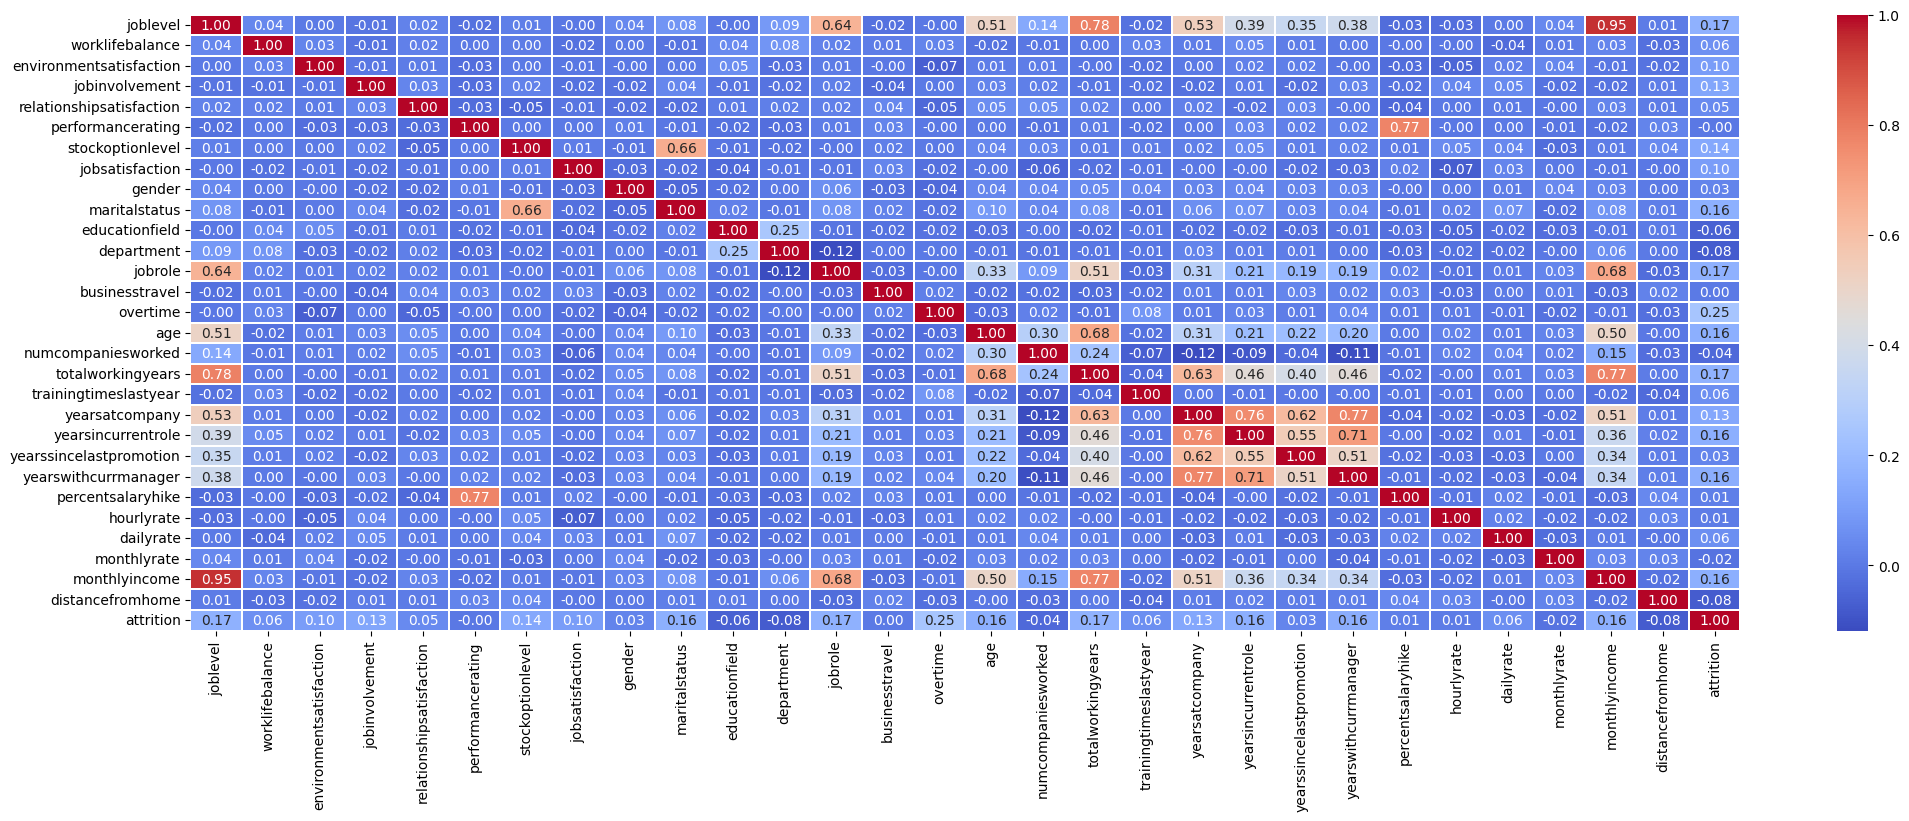

In [69]:
plt.figure(figsize=(25,8))
sns.heatmap(
df_En[['joblevel', 'worklifebalance', 'environmentsatisfaction',
       'jobinvolvement', 'relationshipsatisfaction', 'performancerating',
       'stockoptionlevel', 'jobsatisfaction', 'gender', 'maritalstatus',
       'educationfield', 'department', 'jobrole', 'businesstravel', 'overtime', 'age', 'numcompaniesworked', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
       'hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome',
       'distancefromhome',
       'attrition']].corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.25)
plt.show()